In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8b3a31eb-8269-42e2-b4b4-e24f8ed4a98b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-04-19T17:07:41.564Z', 'error_code': 0, 'error_message': None, 'elapsed': 62, 'credit_count': 1, 'notice': None, 'total_count': 9258}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10166, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935079e+07,1.935079e+07,False,NaN,1,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,29321.985503,2.266506e+10,24.9967,0.086034,-3.045004,-2.173235,5.851010,18.942515,40.287894,5.674035e+11,46.1380,6.157617e+11,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
1,1027,Ethereum,ETH,ethereum,6743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.193441e+08,1.193441e+08,False,NaN,2,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,1982.837826,1.283107e+10,51.2893,-0.079368,-5.454317,3.729978,12.616930,17.049060,28.980232,2.366399e+11,19.2401,2.366399e+11,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
2,825,Tether,USDT,tether,51513,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.118601e+10,8.409174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,1.000770,3.972596e+10,28.7464,-0.005223,0.043003,0.020701,-0.094403,0.053889,0.078598,8.124851e+10,6.6082,8.415648e+10,NaN,2023-04-19T17:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 17:07:44.787043+00:00
3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558650e+08,1.558650e+08,False,NaN,4,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,327.597652,8.029509e+08,10.3087,0.081128,-4.456090,2.578936,-2.552100,3.407705,12.502320,5.106102e+10,4.1520,5.106102e+10,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
4,3408,USD Coin,USDC,usd-coin,11898,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.127788e+10,3.127788e+10,False,NaN,5,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,1.000126,5.696419e+09,44.9724,0.019005,0.009709,0.045191,0.196428,0.013056,-0.001290,3.128183e+10,2.5442,3.128183e+10,NaN,2023-04-19T17:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 17:07:44.787043+00:00
5,52,XRP,XRP,xrp,933,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,0.497390,1.972614e+09,96.3166,-0.034195,-4.310891,-0.946903,32.296773,25.672996,27.173073,2.574035e+10,2.0931,4.973903e+10,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.478536e+10,3.569462e+10,False,NaN,7,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,0.422750,5.176414e+08,56.6396,0.334491,-4.411939,5.283685,26.033508,3.759393,25.398818,1.470550e+10,1.1960,1.902373e+10,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.390048e+11,1.390048e+11,False,NaN,8,NaN,NaN,NaN,2023-04-19T17:06:00.000Z,0.090665,1.115545e+09,42.6986,-0.247304,-2.767975,10.286752,24.989284,1.715161,11.694037,1.260289e+10,1.0250,1.260289e+10,NaN,2023-04-19T17:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 17:07:44.787043+00:00
8,3890,Polygon,MATIC,polygon,662,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutio

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8b3a31eb-8269-42e2-b4b4-e24f8ed4a98b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    if not os.path.isfile(r'D:\New folder\Projects\Portfolio Projects\API.csv'):
        df.to_csv(r'D:\New folder\Projects\Portfolio Projects\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\New folder\Projects\Portfolio Projects\API.csv', mode='a', header=False)

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [8]:
df69 = pd.read_csv(r'D:\New folder\Projects\Portfolio Projects\API.csv')
df69

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.935058e+07,1.935058e+07,False,NaN,1,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,29152.210851,2.398126e+10,38.0313,-0.308556,-2.527546,-2.884464,3.363427,18.968755,40.293070,5.641122e+11,46.1297,6.121964e+11,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
1,1,1027,Ethereum,ETH,ethereum,6741,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.193441e+08,1.193441e+08,False,NaN,2,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1970.235553,1.181813e+10,27.5803,-0.622629,-6.417397,5.155604,10.541654,16.562810,29.173493,2.351359e+11,19.2272,2.351359e+11,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
2,2,825,Tether,USDT,tether,51481,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.106127e+10,8.409174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1.000526,3.987159e+10,28.6980,0.016052,0.012502,-0.016001,-0.278202,0.028582,0.051625,8.110390e+10,6.6331,8.413596e+10,NaN,2023-04-19T10:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 10:52:55.921146+00:00
3,3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558651e+08,1.558651e+08,False,NaN,4,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,327.166638,8.091052e+08,4.6980,-0.381873,-4.915875,2.468508,-3.417337,3.918819,12.484498,5.099387e+10,4.1700,5.099387e+10,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
4,4,3408,USD Coin,USDC,usd-coin,11892,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.137147e+10,3.137147e+10,False,NaN,5,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1.000104,5.615659e+09,38.2929,0.038429,0.012297,0.039757,0.025226,0.012298,0.008577,3.137472e+10,2.5660,3.137472e+10,NaN,2023-04-19T10:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 10:52:55.921146+00:00
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.490771,1.846915e+09,95.2465,0.125239,-4.934259,-2.623562,28.450183,24.933260,26.356932,2.539778e+10,2.0769,4.907708e+10,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.478426e+10,3.569462e+10,False,NaN,7,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.417371,4.785116e+08,14.5973,0.286589,-6.228146,5.551879,21.194908,4.437684,25.443477,1.451796e+10,1.1873,1.878171e+10,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
7,7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.390014e+11,1.390014e+11,False,NaN,8,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.087611,1.013776e+09,-6.9245,-0.000539,-5.983845,6.774386,18.666179,0.499132,8.023368,1.217799e+10,0.9960,1.217799e+10,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
8,8,3890,Polygon,MATIC,polygon,662,2019-04-28T00:00:00.000Z,"['p

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df69

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19350581.00000,19350581.00000,False,NaN,1,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,29152.21085,23981262759.53398,38.03130,-0.30856,-2.52755,-2.88446,3.36343,18.96875,40.29307,564112217409.88623,46.12970,612196427880.26001,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
1,1,1027,Ethereum,ETH,ethereum,6741,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119344051.00320,119344051.00320,False,NaN,2,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1970.23555,11818128506.86495,27.58030,-0.62263,-6.41740,5.15560,10.54165,16.56281,29.17349,235135892357.85904,19.22720,235135892357.85999,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
2,2,825,Tether,USDT,tether,51481,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1.00053,39871589351.89214,28.69800,0.01605,0.01250,-0.01600,-0.27820,0.02858,0.05162,81103899912.17839,6.63310,84135956417.42000,NaN,2023-04-19T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-19 10:52:55.921146+00:00
3,3,1839,BNB,BNB,bnb,1268,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865116.68597,155865116.68597,False,NaN,4,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,327.16664,809105153.64737,4.69800,-0.38187,-4.91587,2.46851,-3.41734,3.91882,12.48450,50993866160.85136,4.17000,50993866160.85000,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
4,4,3408,USD Coin,USDC,usd-coin,11892,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31371467403.30083,31371467403.30083,False,NaN,5,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,1.00010,5615659483.95869,38.29290,0.03843,0.01230,0.03976,0.02523,0.01230,0.00858,31374716036.79692,2.56600,31374716036.80000,NaN,2023-04-19T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-19 10:52:55.921146+00:00
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.49077,1846914926.55759,95.24650,0.12524,-4.93426,-2.62356,28.45018,24.93326,26.35693,25397784421.28730,2.07690,49077075770.94000,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34784259814.72100,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.41737,478511586.34501,14.59730,0.28659,-6.22815,5.55188,21.19491,4.43768,25.44348,14517955929.34540,1.18730,18781713921.77000,NaN,2023-04-19T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-19 10:52:55.921146+00:00
7,7,74,Dogecoin,DOGE,dogecoin,690,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139001406383.70523,139001406383.70523,False,NaN,8,NaN,NaN,NaN,2023-04-19T10:51:00.000Z,0.08761,1013775633.40264,-6.92450,-0.00054,-5.98385,6.77439,18.66618,0.49913,8.02337,12177991201.57631,0.9960

In [11]:
df1 = df69.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [12]:
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17147,-3.03992,-2.30304,4.59269,18.98211,40.58613
Ethereum,-0.25622,-5.67856,4.49388,11.74823,17.05458,29.60925
Tether,0.00505,0.01706,-0.01300,-0.19473,0.03130,0.05579
BNB,-0.32578,-4.78211,2.54861,-3.25462,3.58848,12.83803
USD Coin,-0.00289,-0.00656,0.01331,0.06699,-0.01025,-0.01184
XRP,-0.01542,-4.44328,-1.18625,30.27958,26.07807,27.96848
Cardano,-0.20257,-5.22117,5.37664,23.08544,4.60778,26.09181
Dogecoin,-0.23009,-4.13764,9.27959,21.88227,2.59620,10.96887
Polygon,-0.17623,-4.93634,1.15875,-2.39866,-26.53746,19.13921


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
type(df1)

pandas.core.frame.DataFrame

In [15]:
df2 = df1.stack()
df2

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.17147
                 quote.USD.percent_change_24h    -3.03992
                 quote.USD.percent_change_7d     -2.30304
                 quote.USD.percent_change_30d     4.59269
                 quote.USD.percent_change_60d    18.98211
                 quote.USD.percent_change_90d    40.58613
Ethereum         quote.USD.percent_change_1h     -0.25622
                 quote.USD.percent_change_24h    -5.67856
                 quote.USD.percent_change_7d      4.49388
                 quote.USD.percent_change_30d    11.74823
                 quote.USD.percent_change_60d    17.05458
                 quote.USD.percent_change_90d    29.60925
Tether           quote.USD.percent_change_1h      0.00505
                 quote.USD.percent_change_24h     0.01706
                 quote.USD.percent_change_7d     -0.01300
                 quote.USD.percent_change_30d    -0.19473
                 quote.USD

In [16]:
type(df2)

pandas.core.series.Series

In [17]:
df3 = df2.to_frame(name='values')
df3

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.17147
                quote.USD.percent_change_24h  -3.03992
                quote.USD.percent_change_7d   -2.30304
                quote.USD.percent_change_30d   4.59269
                quote.USD.percent_change_60d  18.98211
                quote.USD.percent_change_90d  40.58613
Ethereum        quote.USD.percent_change_1h   -0.25622
                quote.USD.percent_change_24h  -5.67856
                quote.USD.percent_change_7d    4.49388
                quote.USD.percent_change_30d  11.74823
                quote.USD.percent_change_60d  17.05458
                quote.USD.percent_change_90d  29.60925
Tether          quote.USD.percent_change_1h    0.00505
                quote.USD.percent_change_24h   0.01706
                quote.USD.percent_change_7d   -0.01300
                quote.USD.percent_change_30d  -0.19473
                quote.USD.percent_change_60d   0.03130
                quote.USD.percent_change_90d   0.05579
BNB             quote.USD.percent_change_1h   -0.32578
                quote.USD.percent_change_24h  -4.78211
                quote.USD.percent_change_7d    2.54861
                quote.USD.percent_change_30d  -3.25462
                quote.USD.percent_change_60d   3.58848
                quote.USD.percent_change_90d  12.83803
USD Coin        quote.USD.percent_change_1h   -0.00289
                quote.USD.percent_change_24h  -0.00656
                quote.USD.percent_change_7d    0.01331
                quote.USD.percent_change_30d   0.06699
                quote.USD.percent_change_60d  -0.01025
                quote.USD.percent_change_90d  -0.01184
XRP             quote.USD.percent_change_1h   -0.01542
                quote.USD.percent_change_24h  -4.44328
                quote.USD.percent_change_7d   -1.18625
                quote.USD.percent_change_30d  30.27958
                quote.USD.percent_change_60d  26.07807
                quote.USD.percent_change_90d  27.96848
Cardano         quote.USD.percent_change_1h   -0.20257
                quote.USD.percent_change_24h  -5.22117
                quote.USD.percent_change_7d    5.37664
                quote.USD.percent_change_30d  23.08544
                quote.USD.percent_change_60d   4.60778
                quote.USD.percent_change_90d  26.09181
Dogecoin        quote.USD.percent_change_1h   -0.23009
                quote.USD.percent_change_24h  -4.13764
                quote.USD.percent_change_7d    9.27959
                quote.USD.percent_change_30d  21.88227
                quote.USD.percent_change_60d   2.59620
                quote.USD.percent_change_90d  10.96887
Polygon         quote.USD.percent_change_1h   -0.17623
                quote.USD.percent_change_24h  -4.93634
                quote.USD.percent_change_7d    1.15875
                quote.USD.percent_change_30d  -2.39866
                quote.USD.percent_change_60d -26.53746
                quote.USD.percent_change_90d  19.13921
Solana          quote.USD.percent_change_1h   -0.00886
                quote.USD.percent_change_24h  -7.21620
                quote.USD.percent_change_7d   -1.16646
                quote.USD.percent_change_30d   0.14819
                quote.USD.percent_change_60d  -0.01290
                quote.USD.percent_change_90d  10.57408
Polkadot        quote.USD.percent_change_1h   -0.12471
                quote.USD.percent_change_24h  -6.29243
                quote.USD.percent_change_7d    1.91440
                quote.USD.percent_change_30d   1.22040
                quote.USD.percent_change_60d -10.20091
                quote.USD.percent_change_90d  12.65322
Litecoin        quote.USD.percent_change_1h   -0.38130
                quote.USD.percent_change_24h  -6.66538
                quote.USD.percent_change_7d    3.41828
                quote.USD.percent_change_30d  15.80526
                quote.USD.percent_change_60d  -4.86674
                quote.USD.percent

In [18]:
type(df3)

pandas.core.frame.DataFrame

In [19]:
df3.count()

values    120
dtype: int64

In [20]:
#index = pd.Index(range(120))
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17147
1,Bitcoin,quote.USD.percent_change_24h,-3.03992
2,Bitcoin,quote.USD.percent_change_7d,-2.30304
3,Bitcoin,quote.USD.percent_change_30d,4.59269
4,Bitcoin,quote.USD.percent_change_60d,18.98211
5,Bitcoin,quote.USD.percent_change_90d,40.58613
6,Ethereum,quote.USD.percent_change_1h,-0.25622
7,Ethereum,quote.USD.percent_change_24h,-5.67856
8,Ethereum,quote.USD.percent_change_7d,4.49388
9,Ethereum,quote.USD.percent_change_30d,11.74823


In [21]:
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17147
1,Bitcoin,quote.USD.percent_change_24h,-3.03992
2,Bitcoin,quote.USD.percent_change_7d,-2.30304
3,Bitcoin,quote.USD.percent_change_30d,4.59269
4,Bitcoin,quote.USD.percent_change_60d,18.98211
5,Bitcoin,quote.USD.percent_change_90d,40.58613
6,Ethereum,quote.USD.percent_change_1h,-0.25622
7,Ethereum,quote.USD.percent_change_24h,-5.67856
8,Ethereum,quote.USD.percent_change_7d,4.49388
9,Ethereum,quote.USD.percent_change_30d,11.74823


In [22]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

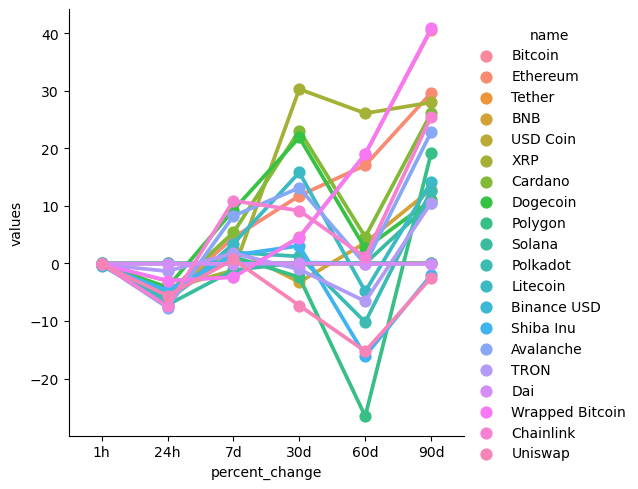

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point');

In [24]:
df6 = df69[['name', 'quote.USD.price', 'timestamp']]

In [25]:
df6 = df6.query("name == 'Bitcoin'")

In [26]:
df6

,name,quote.USD.price,timestamp
0,Bitcoin,29152.21085,2023-04-19 10:52:55.921146+00:00
20,Bitcoin,29149.54109,2023-04-19 10:53:56.488773+00:00
40,Bitcoin,29204.78899,2023-04-19 10:54:56.990751+00:00
60,Bitcoin,29298.30524,2023-04-19 11:53:56.255769+00:00
80,Bitcoin,29294.36201,2023-04-19 11:54:56.965351+00:00
100,Bitcoin,29298.00941,2023-04-19 11:55:57.749891+00:00
120,Bitcoin,29301.52728,2023-04-19 11:56:58.568171+00:00
140,Bitcoin,29253.84458,2023-04-19 12:15:47.579408+00:00
160,Bitcoin,29246.83100,2023-04-19 12:16:48.891156+00:00
180,Bitcoin,29238.58428,2023-04-19 12:17:49.612580+00:00


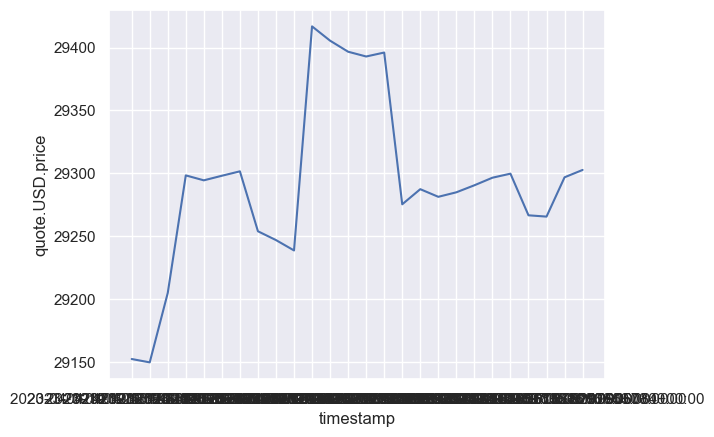

In [27]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df6);